In [42]:
#Install TensorFlow, OpenCV, and Matplotlib
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [43]:
# Import Dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
# Verifying correct data separation
print(os.listdir('chest_xray/train'))
os.listdir('chest_xray/test')

['NORMAL', 'PNEUMONIA']


['NORMAL', 'PNEUMONIA']

In [45]:
# Checking image size
img = cv2.imread(os.path.join('chest_xray', 'train', 'NORMAL', 'NORMAL-28501-0001.jpeg'))
img.shape

(2418, 2434, 3)

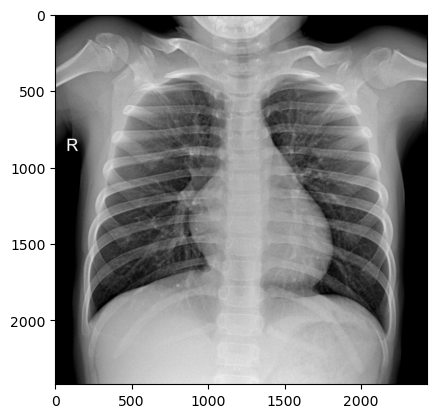

In [46]:
# Example image
plt.imshow(img)

In [47]:
#Checking sizes of testing and training data
test_data = tf.keras.utils.image_dataset_from_directory('chest_xray/test', batch_size=32)
train_data = tf.keras.utils.image_dataset_from_directory('chest_xray/train', batch_size=32)

Found 624 files belonging to 2 classes.
Found 5232 files belonging to 2 classes.


In [48]:
# Getting a batch of data
training_data_iterator = train_data.as_numpy_iterator()
testing_data_iterator = test_data.as_numpy_iterator()

train_batch = training_data_iterator.next()
test_batch = testing_data_iterator.next()
print(test_batch[0].shape)
train_batch[0].shape

(32, 256, 256, 3)


(32, 256, 256, 3)

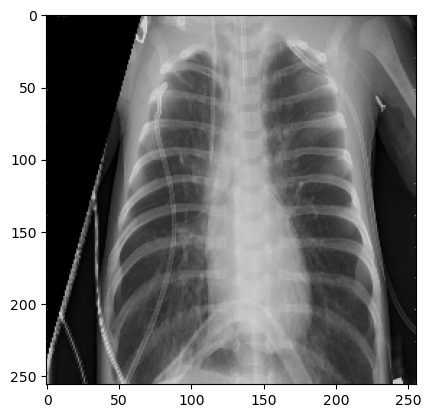

In [49]:
plt.imshow(test_batch[0][0].astype('int'))

In [50]:
# 1 = Pneumonia, 0 = Normal
train_batch[1]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [51]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].set_title(train_batch[1][idx])

Error in callback <function flush_figures at 0x000002400598AD40> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Initial bounds
print(train_batch[0].min(), train_batch[0].max())
print(test_batch[0].min(), test_batch[0].max())

0.0 255.0
0.0 255.0


In [ ]:
# Scaled data bounds
train_scaled = train_batch[0] / 255
test_scaled = test_batch[0] / 255

print(train_scaled.min(), train_scaled.max())
print(test_scaled.min(), test_scaled.max())

0.0 1.0
0.0 1.0


# PreProcessing

In [ ]:
# Scaling the data
train_scaled_data = train_data.map(lambda x, y: (x/255, y))
test_scaled_data = test_data.map(lambda x, y: (x/255, y))

In [ ]:
# Veryfing bounds of scaled data
train_scaled_data.as_numpy_iterator().next()[0].max(), train_scaled_data.as_numpy_iterator().next()[0].min()
test_scaled_data.as_numpy_iterator().next()[0].max(), test_scaled_data.as_numpy_iterator().next()[0].min()

(1.0, 0.0)

In [ ]:
# Number of batches
print(len(train_scaled_data))
print(len(test_scaled_data))

164
20


# Building the Model

In [ ]:
# Model dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Model Initialization
model = Sequential()

In [ ]:
# Add a 2D convolutional layer with 16 filters, a 3x3 kernel, Stride of 1, and ReLU activation
# Input shape is (256, 256, 3)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))

# Add a max pooling layer
model.add(MaxPooling2D())

# Add another 2D convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3,3), 1, activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D())

# Add another 2D convolutional layer with 16 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(16, (3,3), 1, activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D())

# Flatten the output of the previous layer
model.add(Flatten())

# Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add a final fully connected layer with 1 unit and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
# Fitting the model
hist = model.fit(train_scaled_data, epochs=10)

Epoch 1/10




164/164 [==============================] - 15s 83ms/step - loss: 0.2627 - accuracy: 0.8870
Epoch 2/10
164/164 [==============================] - 13s 79ms/step - loss: 0.1285 - accuracy: 0.9509
Epoch 3/10
164/164 [==============================] - 14s 81ms/step - loss: 0.0780 - accuracy: 0.9729
Epoch 4/10
164/164 [==============================] - 13s 80ms/step - loss: 0.0690 - accuracy: 0.9761
Epoch 5/10
164/164 [==============================] - 13s 80ms/step - loss: 0.0495 - accuracy: 0.9826
Epoch 6/10
164/164 [==============================] - 13s 79ms/step - loss: 0.0334 - accuracy: 0.9897
Epoch 7/10
164/164 [==============================] - 14s 82ms/step - loss: 0.0308 - accuracy: 0.9883
Epoch 8/10
164/164 [==============================] - 13s 79ms/step - loss: 0.0227 - accuracy: 0.9918
Epoch 9/10
164/164 [==============================] - 13s 78ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 10/10
164/164 [==============================] - 13s 78ms/step - loss: 0.0199 - accur

In [ ]:
# Model evaluation
model_hist = pd.DataFrame(hist.history)
model_hist

,loss,accuracy
0,0.262711,0.887041
1,0.128531,0.950879
2,0.077954,0.972859
3,0.069045,0.976109
4,0.049478,0.982607
5,0.033394,0.989679
6,0.030792,0.988341
7,0.022738,0.991781
8,0.023538,0.992737
9,0.019909,0.991399


# Plotting

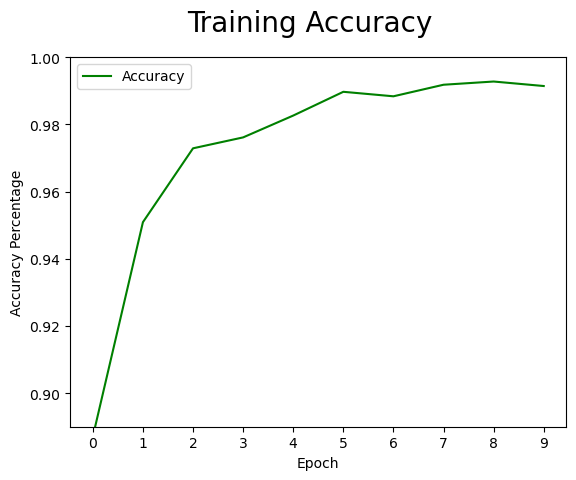

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='Accuracy')
fig.suptitle('Training Accuracy', fontsize=20)
plt.legend(loc='best')
plt.xticks(range(0,10))
plt.ylim(0.89,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy Percentage')
plt.show()

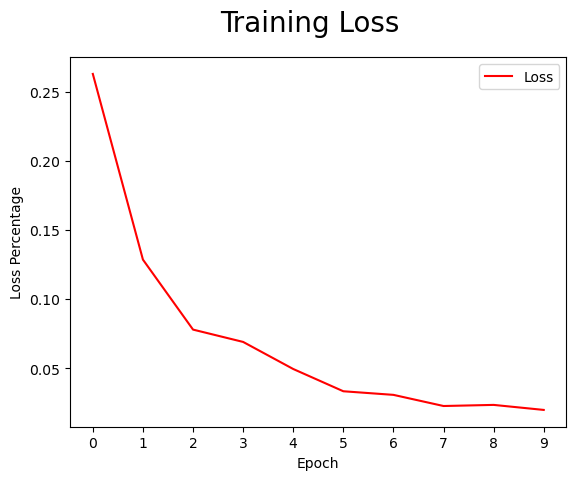

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='Loss')
fig.suptitle('Training Loss', fontsize=20)
plt.legend(loc='best')
plt.xticks(range(0,10))
plt.xlabel('Epoch')
plt.ylabel('Loss Percentage')
plt.show()

# Evaluation

In [ ]:
# Testing Dependencies
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
# Testing the model
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test_scaled_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 79ms/step


In [ ]:
# Model evaluation
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8234042525291443, Recall: 0.9923076629638672, Accuracy: 0.8621794581413269


In [52]:
# Saving the model
model.save('models/pneumonia_model.h5')

c:\Users\Cole\anaconda3\envs\dev\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
